In [1]:
#imported all libraries as per requirement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading csv file through head looking what my dataset have
data=pd.read_csv("C:\\Users\\sam\\Downloads\\penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
#from this we wil get to know dataset type and non null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
#dropping null values
data.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
#checking,how many rows and columns are there
data.shape

(344, 7)

In [6]:
#checking null values
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
#checking count of male and female
data['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
#replacing special character with nan values
data['sex'].replace(".",np.nan,inplace=True)

In [9]:
#checking count of male and female
data['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

<AxesSubplot:>

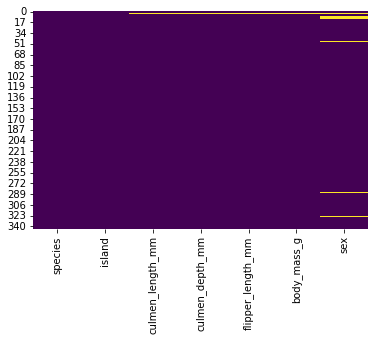

In [10]:
#heatmap to visualize null values
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [11]:
#filling nan values with the help of mode
cat_col=['sex']
for col in cat_col:
    data[col].fillna(data[col].mode().iloc[0],inplace=True)

data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
#checking count of male and female
data['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [13]:
#filling nan values with the help of mean
num_col=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
for col in num_col:
    data[col]=pd.to_numeric(data[col])
    data[col].fillna(data[col].mean(),inplace=True)
    
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [14]:
#checking null values
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

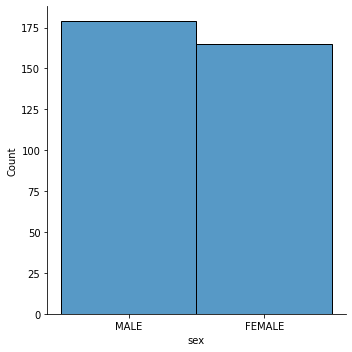

In [15]:
#plotting displot to visualize count
sns.displot(data['sex'])

C:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flipper_length_mm'>

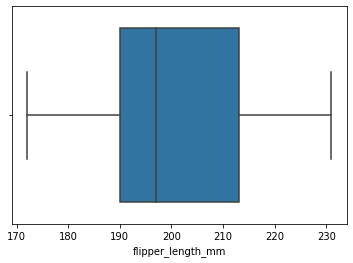

In [16]:
#plotting boxplot to check outlier
sns.boxplot(data['flipper_length_mm'])

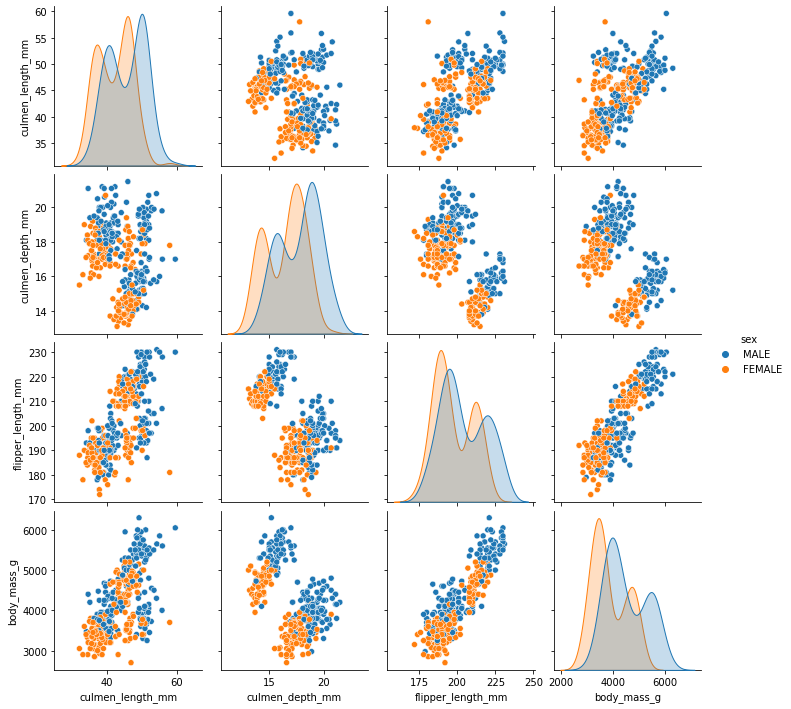

In [17]:
#visualizing independent feature with dependent feature with help of pair plot
sns.pairplot(data,hue='sex')

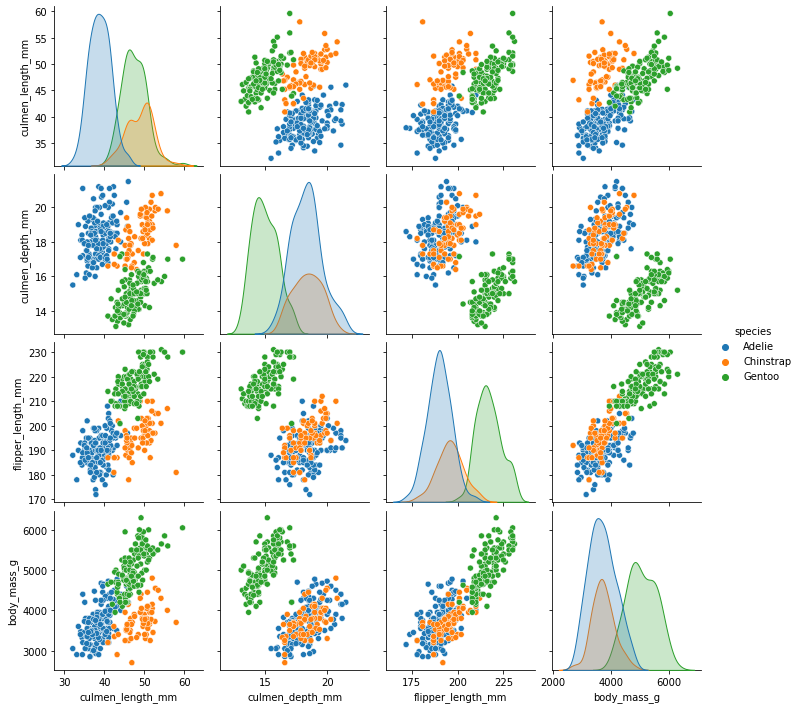

In [18]:
#pairplot to visualize data
sns.pairplot(data,hue='species')

In [19]:
#5 point summaries
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
#calculating count according to island and resetting index 
df = data['island'].value_counts().reset_index()

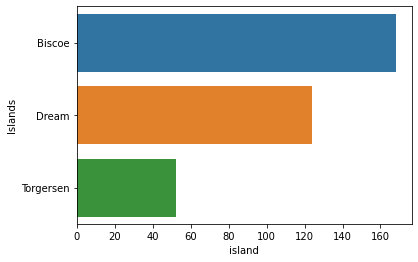

In [21]:
#with the help of barplot analyzing values_count 
fig=sns.barplot(data=df,x='island',y='index')
fig.set(ylabel='Islands')
plt.show()

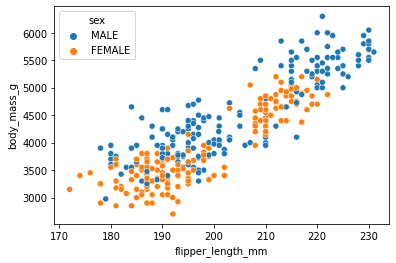

In [22]:
#with help of scatter plot will analyze flipper_length_mm relationship towards body_mass_g 
sns.scatterplot(data=data,x='flipper_length_mm',y='body_mass_g',hue='sex')
plt.show()

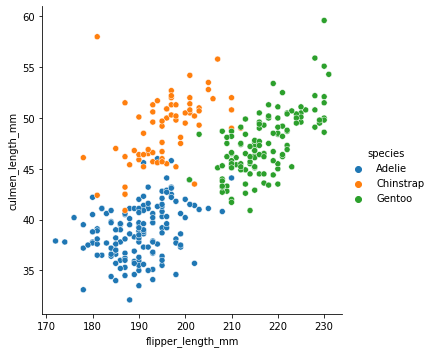

In [23]:
#with help of relplot will analyze flipper_length_mm relationship towards culmen_length_mm in the presence species 
sns.relplot(data=data,x="flipper_length_mm",y="culmen_length_mm", hue="species")

<AxesSubplot:>

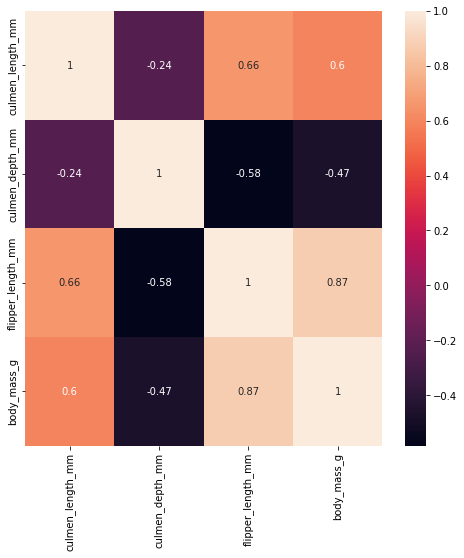

In [24]:
#correlation gives idea about how columns are linearly related to each other
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)

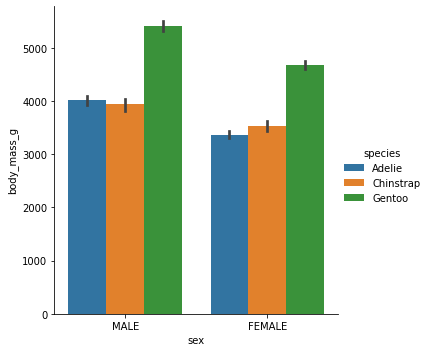

In [25]:
#plotting catplot will analyze how sex and body_mass_g is distributed 
sns.catplot(x="sex", y="body_mass_g", hue="species", kind="bar", data=data)

In [26]:
#with help get_dummies categorical value converted into numerical value
x=data.drop('sex',axis=1)
x=pd.get_dummies(x)
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,0,1


In [27]:
#with help label encoding categorical value converted into numerical value
from sklearn.preprocessing import LabelEncoder
y=data['sex']
le=LabelEncoder()
y=le.fit_transform(y)
y_encode=pd.DataFrame(y)


In [28]:
#top 5 records
y_encode.head()

,0
0,1
1,0
2,0
3,1
4,0


In [29]:
# training our dataset to perform operation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
# import Logistic Regression  and fitting dataset
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [32]:
#finding out accuracy with help of logistic Regression
pred_logistic=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_logistic)

0.9038461538461539

In [33]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_logistic))

[[42  7]
 [ 3 52]]


In [34]:
#imported DecisionTree and fitted model
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='gini')
DTClassifier.fit(x_train,y_train)
pred_Tree=DTClassifier.predict(x_test)

In [35]:
#finding out accuracy  DecisionTree 
accuracy_score(y_test,pred_Tree)

0.8846153846153846

In [36]:
#confusion Matrix
print(confusion_matrix(y_test,pred_Tree))

[[44  5]
 [ 7 48]]
